<a href="https://colab.research.google.com/github/KunalSanghvii/Nuel/blob/main/Nuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [ ]:
try:
    df_transactions = pd.read_csv(
        "/Retail_Transactions_Dataset.csv",
        low_memory=False,
        on_bad_lines="skip",
    )
    print("Transactions dataset loaded successfully.")
except Exception as e:
    print(f"Error reading Retail_Transactions_Dataset.csv: {e}")
    exit()

try:
    df_holidays = pd.read_csv("/United States_US.csv")
    print("Holidays dataset loaded successfully.")
except Exception as e:
    print(f"Error reading United States_US.csv: {e}")
    exit()


print("First 5 rows of the transactions dataset:")
print(df_transactions.head())
print("\nFirst 5 rows of the holidays dataset:")
print(df_holidays.head())


Transactions dataset loaded successfully.
Holidays dataset loaded successfully.
First 5 rows of the transactions dataset:
  Transaction_ID                 Date      Customer_Name  \
0     1000000000  2022-01-21 06:27:29       Stacey Price   
1     1000000001  2023-03-01 13:01:21   Michelle Carlson   
2     1000000002  2024-03-21 15:37:04        Lisa Graves   
3     1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4     1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product Total_Items Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']           3      71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...           2      25.93   
2                                        ['Spinach']           6      41.49   
3                             ['Tissues', 'Mustard']           1      39.34   
4                                      ['Dish Soap']          10      16.42   

   Payment_Method           City        St

In [ ]:
df_transactions['Date'] = pd.to_datetime(df_transactions['Date'], errors='coerce')
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], errors='coerce', utc=True).dt.tz_convert(None)


df_transactions.dropna(subset=['Date'], inplace=True)
df_holidays.dropna(subset=['Date'], inplace=True)


df_transactions['Holiday'] = None
df_transactions['Holiday_Type'] = None

for index, holiday_row in df_holidays.iterrows():
    holiday_date = holiday_row['Date']
    holiday_name = holiday_row['Name']
    holiday_type = holiday_row['Type']


    df_transactions.loc[df_transactions['Date'].dt.date == holiday_date.date(), ['Holiday', 'Type']] = [holiday_name, holiday_type]


df_transactions.to_csv("/Consolidated_Retail_Transactions.csv", index=False)
print(df_transactions.head())


  Transaction_ID                Date      Customer_Name  \
0     1000000000 2022-01-21 06:27:29       Stacey Price   
1     1000000001 2023-03-01 13:01:21   Michelle Carlson   
2     1000000002 2024-03-21 15:37:04        Lisa Graves   
3     1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4     1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             Product Total_Items Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']           3      71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...           2      25.93   
2                                        ['Spinach']           6      41.49   
3                             ['Tissues', 'Mustard']           1      39.34   
4                                      ['Dish Soap']          10      16.42   

   Payment_Method           City        Store_Type Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club             True   
1            Cash  San Franc

In [ ]:
df = pd.read_csv("/Consolidated_Retail_Transactions.csv", low_memory=False, dtype=str)

df['Holiday'] = df['Holiday'].fillna('No Holiday')
df['Holiday_Type'] = df['Holiday_Type'].fillna('No Holiday Type')
df['Promotion'] = df['Promotion'].fillna('No Promotion')

categorical_cols = ['Customer_Name', 'City', 'Store_Type', 'Customer_Category', 'Payment_Method']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


text_cols = ['Customer_Name', 'City', 'Store_Type', 'Customer_Category', 'Holiday', 'Promotion']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()


def safe_eval(val):
    try:
        if isinstance(val, str) and val.startswith('['):
            return ast.literal_eval(val)
        return val
    except (SyntaxError, ValueError):
        return None

df['Product'] = df['Product'].apply(safe_eval)
df['Holiday_Type'] = df['Holiday_Type'].apply(safe_eval)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
numerical_cols = ['Total_Items', 'Total_Cost']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Remove duplicates
df.drop_duplicates(subset=['Transaction_ID'], inplace=True)

df = df.drop(columns=["Holiday_Type"])


df.to_csv("/Cleaned_Retail_Transactions.csv", index=False)
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 999929 entries, 0 to 1989958
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     999929 non-null  object        
 1   Date               999929 non-null  datetime64[ns]
 2   Customer_Name      999929 non-null  object        
 3   Product            999919 non-null  object        
 4   Total_Items        999915 non-null  float64       
 5   Total_Cost         999912 non-null  float64       
 6   Payment_Method     999929 non-null  object        
 7   City               999929 non-null  object        
 8   Store_Type         999929 non-null  object        
 9   Discount_Applied   999908 non-null  object        
 10  Customer_Category  999929 non-null  object        
 11  Season             999897 non-null  object        
 12  Promotion          999929 non-null  object        
 13  Holiday            999929 non-null  object      

<ipython-input-5-d7950d2c5a43>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


       Transaction_ID    Total_Items     Total_Cost
count    9.999290e+05  999915.000000  999912.000000
mean     1.000499e+09       5.496025      52.455169
std      1.041347e+06       2.872431      27.417076
min      1.604000e+03       1.000000       5.000000
25%      1.000250e+09       3.000000      28.710000
50%      1.000500e+09       5.000000      52.420000
75%      1.000750e+09       8.000000      76.190000
max      1.001000e+09      71.620000     100.000000
Transaction_ID            0
Date                      0
Customer_Name             0
Product                  10
Total_Items              14
Total_Cost               17
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied         21
Customer_Category         0
Season                   32
Promotion                 0
Holiday                   0
Type                 832675
dtype: int64
Outliers in Total_Items:
        Transaction_ID                 Date  Customer_Name Product  \
2598

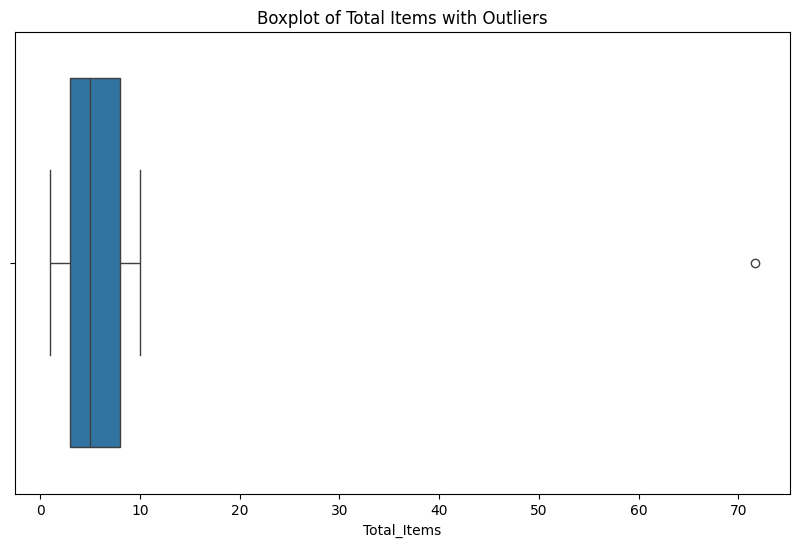

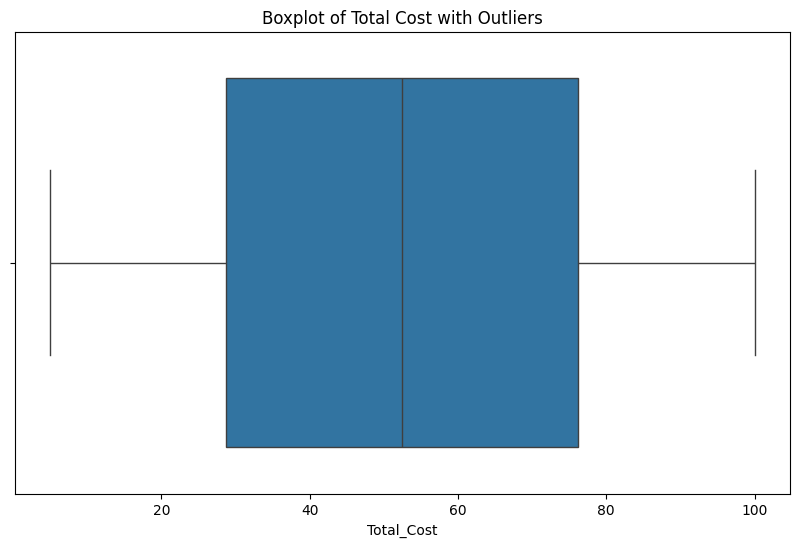

In [ ]:
df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


print(df.describe())
print(df.isnull().sum())


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers_total_items = detect_outliers(df, 'Total_Items')
print("Outliers in Total_Items:")
print(outliers_total_items)


outliers_total_cost = detect_outliers(df, 'Total_Cost')
print("\nOutliers in Total_Cost:")
print(outliers_total_cost)


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Items')
plt.title('Boxplot of Total Items with Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Cost')
plt.title('Boxplot of Total Cost with Outliers')
plt.show()



<ipython-input-6-c644dba9458b>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")
<ipython-input-6-c644dba9458b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='viridis')


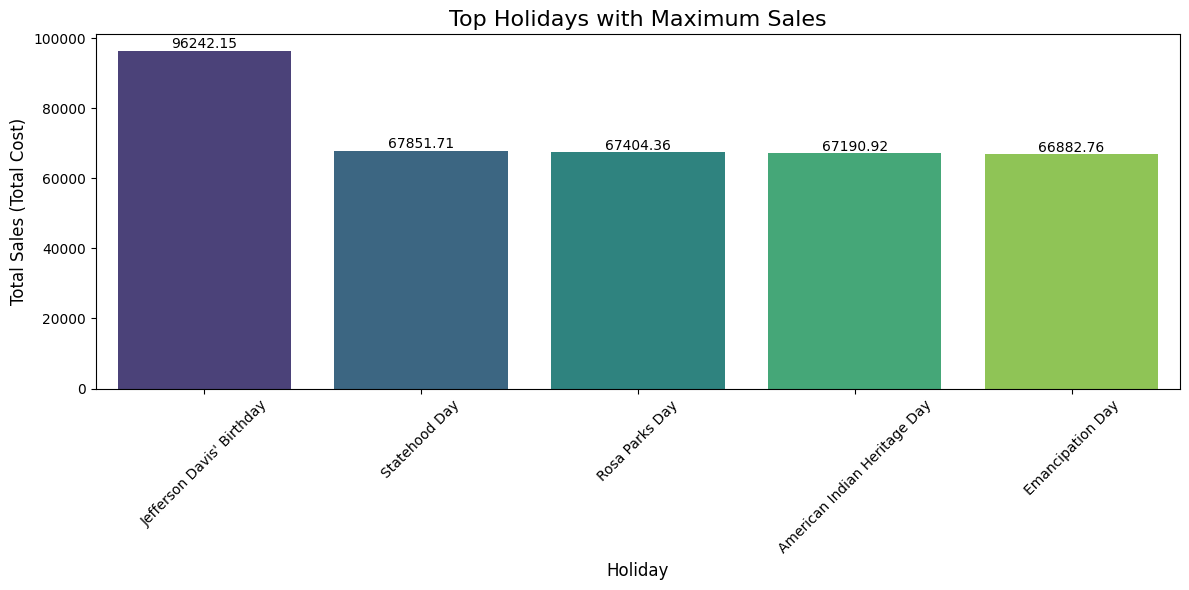

In [ ]:

df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


required_columns = ['Holiday', 'Total_Cost']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")

df_filtered = df[df['Holiday'] != 'No Holiday']


holiday_sales = (
    df_filtered.groupby('Holiday')['Total_Cost']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)


plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='viridis')

plt.title('Top Holidays with Maximum Sales', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Total Sales (Total Cost)', fontsize=12)


for index, value in enumerate(holiday_sales.values):
    plt.text(index, value + (value * 0.01), f"{value:.2f}", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



<ipython-input-7-5987298545bb>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


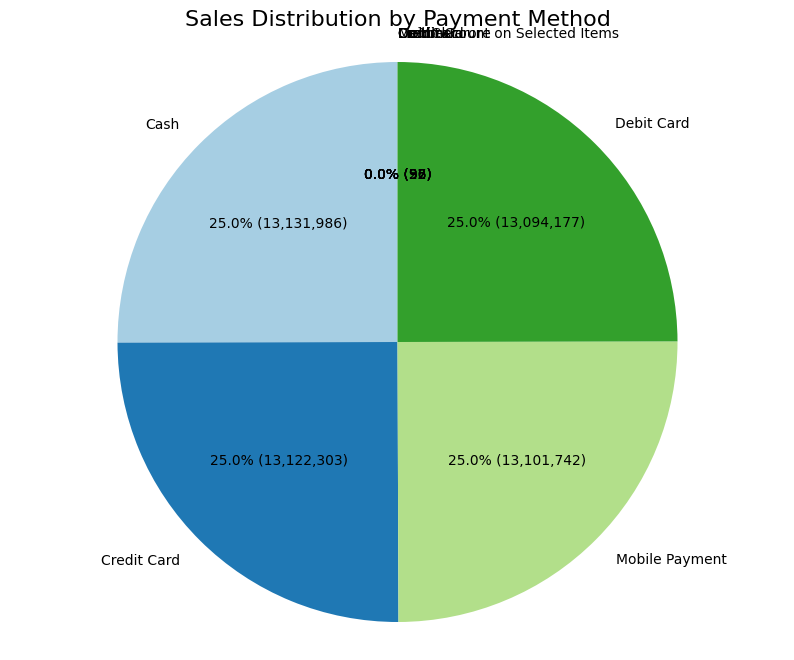

In [ ]:

df = pd.read_csv("/Cleaned_Retail_Transactions.csv")

required_columns = ['Payment_Method', 'Total_Cost']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Dataset must contain the following columns: {required_columns}")


df_filtered = df.dropna(subset=['Payment_Method', 'Total_Cost'])


payment_method_sales = (
    df_filtered.groupby('Payment_Method')['Total_Cost']
    .sum()
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 8))
payment_method_sales.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(payment_method_sales) / 100):,})',
    startangle=90,
    colors=plt.cm.Paired.colors
)


plt.title('Sales Distribution by Payment Method', fontsize=16)
plt.ylabel('')
plt.axis('equal')

plt.show()


<ipython-input-8-35596800b4e1>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


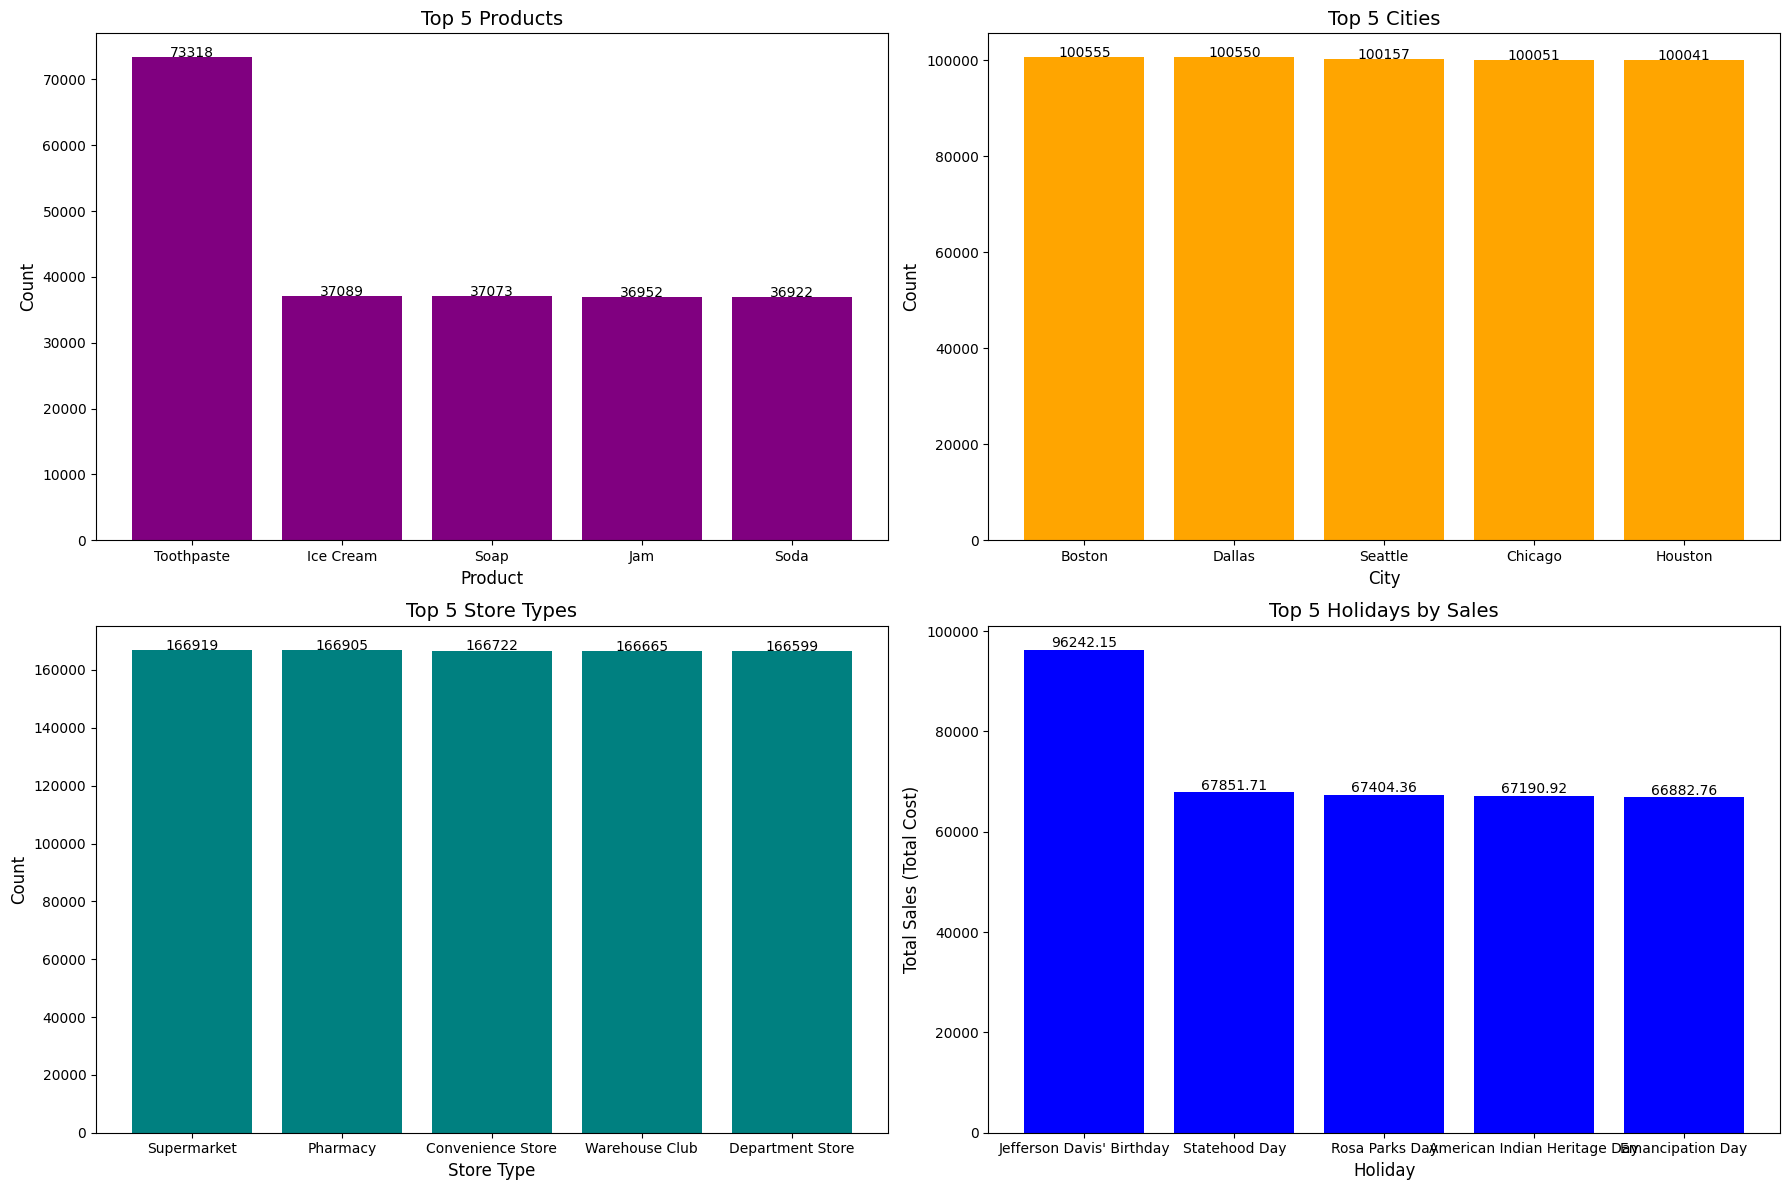

In [ ]:

df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


df['Product'] = df['Product'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else [])
all_products = [item for sublist in df['Product'] for item in sublist]
product_counts = Counter(all_products)
top_products = pd.DataFrame(product_counts.most_common(5), columns=['Product', 'Count'])

top_cities = df['City'].value_counts().head(5)


top_store_types = df['Store_Type'].value_counts().head(5)


df_holidays = df[df['Holiday'] != 'No Holiday']
holiday_sales = df_holidays.groupby('Holiday')['Total_Cost'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))


axes[0, 0].bar(top_products['Product'], top_products['Count'], color='purple')
for i, v in enumerate(top_products['Count']):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontsize=10)
axes[0, 0].set_title('Top 5 Products', fontsize=14)
axes[0, 0].set_xlabel('Product', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)


axes[0, 1].bar(top_cities.index, top_cities.values, color='orange')
for i, v in enumerate(top_cities.values):
    axes[0, 1].text(i, v + 50, str(v), ha='center', fontsize=10)
axes[0, 1].set_title('Top 5 Cities', fontsize=14)
axes[0, 1].set_xlabel('City', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)


axes[1, 0].bar(top_store_types.index, top_store_types.values, color='teal')
for i, v in enumerate(top_store_types.values):
    axes[1, 0].text(i, v + 50, str(v), ha='center', fontsize=10)
axes[1, 0].set_title('Top 5 Store Types', fontsize=14)
axes[1, 0].set_xlabel('Store Type', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)


axes[1, 1].bar(holiday_sales.index, holiday_sales.values, color='blue')
for i, v in enumerate(holiday_sales.values):
    axes[1, 1].text(i, v + 500, f"{v:.2f}", ha='center', fontsize=10)
axes[1, 1].set_title('Top 5 Holidays by Sales', fontsize=14)
axes[1, 1].set_xlabel('Holiday', fontsize=12)
axes[1, 1].set_ylabel('Total Sales (Total Cost)', fontsize=12)


plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


df['Product'] = df['Product'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else [])
all_products = [item for sublist in df['Product'] for item in sublist]
product_counts = Counter(all_products)
last_products = pd.DataFrame(product_counts.most_common()[-5:], columns=['Product', 'Count'])
total_products = sum(product_counts.values())
last_products['Percentage'] = (last_products['Count'] / total_products) * 100


store_counts = df['Store_Type'].value_counts()
last_store_types = store_counts.tail(5)
total_store_types = store_counts.sum()
last_store_types_percentage = (last_store_types / total_store_types) * 100


print("Last 5 Products:")
print(last_products[['Product', 'Count']])


print("\nLast 5 Store Types:")
last_store_types_df = pd.DataFrame({
    'Store_Type': last_store_types.index,
    'Count': last_store_types.values,
})
print(last_store_types_df)



<ipython-input-9-41f7af26ac3c>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")


Last 5 Products:
      Product  Count
0  Trash Bags  36182
1     Appleam      1
2      Sheese      1
3        Must      1
4    Ligogurt      1

Last 5 Store Types:
                   Store_Type  Count
0            Specialty Enager      1
1             Sp One Get One)      1
2                       Sonal      1
3       Wareho Selected Items      1
4  Discount On Selected Items      1


<ipython-input-10-1bedaa2b3329>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Cleaned_Retail_Transactions.csv")
<ipython-input-10-1bedaa2b3329>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Total_Cost'].sum()
<ipython-input-10-1bedaa2b3329>:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df.resample('Y')['Total_Cost'].sum()


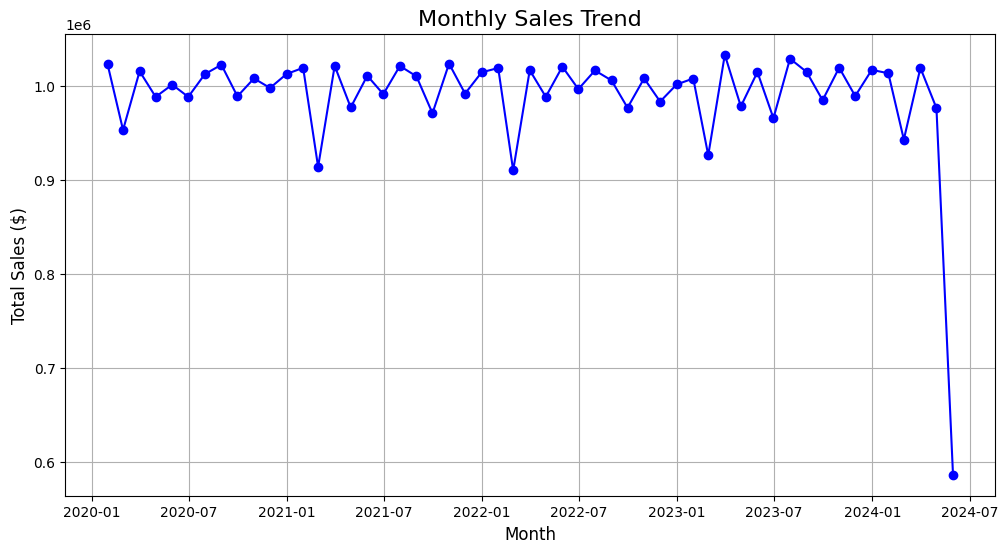

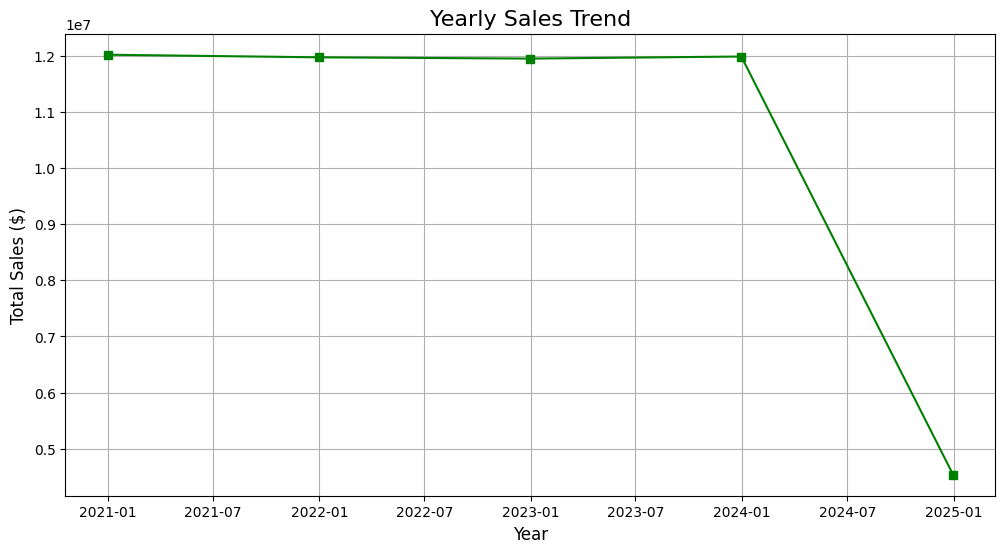

In [ ]:
df = pd.read_csv("/Cleaned_Retail_Transactions.csv")

df['Date'] = pd.to_datetime(df['Date'])


df.set_index('Date', inplace=True)


monthly_sales = df.resample('M')['Total_Cost'].sum()


yearly_sales = df.resample('Y')['Total_Cost'].sum()

seasonal_sales = df.groupby('Season')['Total_Cost'].sum()

holiday_sales = df.groupby('Holiday')['Total_Cost'].sum()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='s', linestyle='-', color='g')
plt.title('Yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:

import plotly.express as px


city_coordinates = {
    'New York': {'lat': 40.7128, 'lon': -74.0060},
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'Chicago': {'lat': 41.8781, 'lon': -87.6298},
    'Houston': {'lat': 29.7604, 'lon': -95.3698},
    'San Francisco': {'lat': 37.7749, 'lon': -122.4194},

}

df = pd.read_csv('/Cleaned_Retail_Transactions.csv', dtype={'City': 'str'}, low_memory=False)


df['City'] = df['City'].apply(lambda x: x if x in city_coordinates.keys() else None)
df = df.dropna(subset=['City'])


city_sales = df.groupby('City')['Total_Cost'].sum().reset_index()


city_sales['lat'] = city_sales['City'].map(lambda x: city_coordinates[x]['lat'])
city_sales['lon'] = city_sales['City'].map(lambda x: city_coordinates[x]['lon'])


fig = px.scatter_geo(
    city_sales,
    lat='lat',
    lon='lon',
    size='Total_Cost',
    text='City',
    color='Total_Cost',
    color_continuous_scale='Viridis',
    title='Geographic Heatmap of Store Performance',
)

fig.update_layout(
    geo=dict(
        scope='usa',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        showocean=True,
        oceancolor='rgb(204, 227, 242)',
        showlakes=True,
        lakecolor='rgb(204, 227, 242)',
        showcountries=True,
    ),
)

fig.show()



<ipython-input-12-3565d38c985b>:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



<Figure size 1200x800 with 0 Axes>

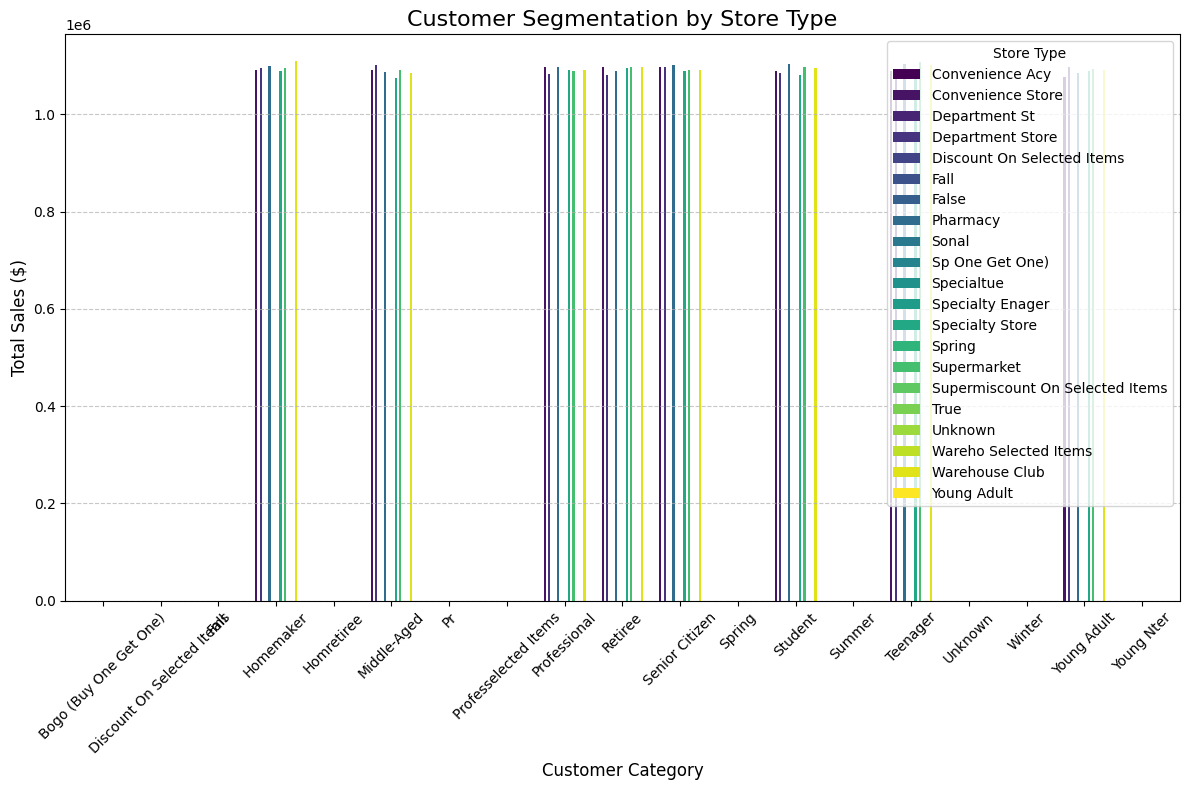

In [ ]:
df = pd.read_csv('/Cleaned_Retail_Transactions.csv')


segmentation_data = df.groupby(['Customer_Category', 'Store_Type'])['Total_Cost'].sum().unstack()

# clustered bar chart
plt.figure(figsize=(12, 8))
segmentation_data.plot(kind='bar', figsize=(12, 8), width=0.8, cmap='viridis')


plt.title('Customer Segmentation by Store Type', fontsize=16)
plt.xlabel('Customer Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Store Type', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


chunk_size = 5000
df_chunks = pd.read_csv('/Cleaned_Retail_Transactions.csv', chunksize=chunk_size)


data = pd.concat(df_chunks, ignore_index=True)


data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'])


target = 'Total_Cost'
X = data.drop(columns=[target], errors='ignore')
y = data[target]


data = data.dropna(subset=[target])


X = data.drop(columns=[target], errors='ignore')
y = data[target]


numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[categorical_features] = X[categorical_features].astype(str)


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 23.74
Mean Squared Error (MSE): 751.85
R-Squared (R²): -0.00


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


chunk_size = 1000
df_chunks = pd.read_csv('/Cleaned_Retail_Transactions.csv', chunksize=chunk_size)
data = pd.concat(df_chunks, ignore_index=True)


data = data.sample(frac=0.01, random_state=42)


data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'], errors='ignore')


target = 'Total_Cost'
data = data.dropna(subset=[target])

X = data.drop(columns=[target], errors='ignore')
y = data[target]

for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = X[col].astype('category').cat.codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#  Random Forest model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Model:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R²: {rf_r2:.2f}")

# XGBoost model
xgb_model = XGBRegressor(n_jobs=-1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nXGBoost Model:")
print(f"MAE: {xgb_mae:.2f}")
print(f"MSE: {xgb_mse:.2f}")
print(f"R²: {xgb_r2:.2f}")


Random Forest Model:
MAE: 24.22
MSE: 785.50
R²: -0.02

XGBoost Model:
MAE: 25.11
MSE: 872.34
R²: -0.13


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor


data = pd.read_csv('/Cleaned_Retail_Transactions.csv', low_memory=False).sample(frac=0.1, random_state=42)


data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data.drop(columns=['Date'], errors='ignore')


data['Per_Item_Cost'] = data['Total_Cost'] / (data['Total_Items'] + 1e-5)
target = 'Per_Item_Cost'


data = data.dropna(subset=[target])
X = data.drop(columns=[target], errors='ignore')
y = data[target]

# Handle outliers
q1, q3 = y.quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
mask = (y >= lower_bound) & (y <= upper_bound)
X = X[mask]
y = y[mask]


for col in X.select_dtypes(include=['number']).columns:
    X[col] = np.log1p(X[col])

for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train_transformed = np.log1p(y_train)

# LightGBM Model
lgb_model = LGBMRegressor(random_state=42, n_estimators=300, max_depth=7, learning_rate=0.05, n_jobs=-1)
lgb_model.fit(X_train, y_train_transformed)

y_pred_transformed = lgb_model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)

print("LightGBM Model for Per_Item_Cost:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 72180, number of used features: 18
[LightGBM] [Info] Start training from score 2.222657
LightGBM Model for Per_Item_Cost:
MAE: 0.04
MSE: 0.00
R²: 1.00


In [ ]:
from sklearn.model_selection import cross_val_score

#  5-fold cross-validation
scores = cross_val_score(
    lgb_model, X, np.log1p(y),
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

cv_mse = -scores.mean()
cv_rmse = np.sqrt(cv_mse)

print(f"Cross-Validation MSE: {cv_mse:.4f}")
print(f"Cross-Validation RMSE: {cv_rmse:.4f}")


Cross-Validation MSE: 0.0000
Cross-Validation RMSE: 0.0055


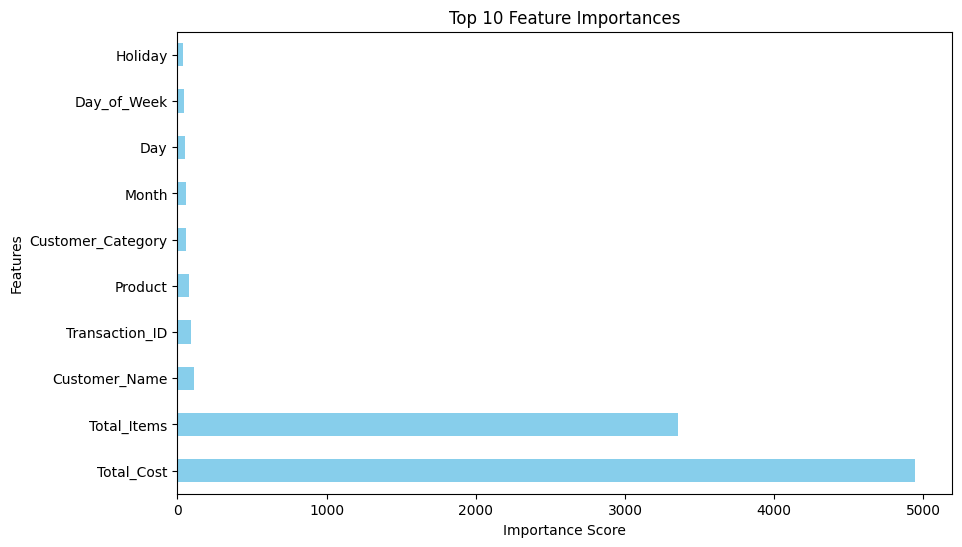

In [ ]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(lgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X, np.log1p(y))

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation MSE:", -random_search.best_score_)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 90225, number of used features: 18
[LightGBM] [Info] Start training from score 2.220720
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Cross-Validation MSE: 2.8377439781489613e-05


In [ ]:
best_model = random_search.best_estimator_


y_pred_tuned_transformed = best_model.predict(X_test)
y_pred_tuned = np.expm1(y_pred_tuned_transformed)

print("Tuned LightGBM Model:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_tuned):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_tuned):.2f}")
print(f"R²: {r2_score(y_test, y_pred_tuned):.2f}")


Tuned LightGBM Model:
MAE: 0.04
MSE: 0.00
R²: 1.00
